In [64]:
# dirty hack to temporarily allow relative import
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [65]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the dataset

In [66]:
config_path = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/blstm/001.json'
with open(config_path) as f:
    config = json.load(f)

In [67]:
train_dataloader = datasets.setup.prepare_dataloader(config, 'train')

val_dataloader = datasets.setup.prepare_dataloader(config, 'val')

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

{'name': 'wild-mix', 'transform': 'stft', 'config': {'input_dimensions': 'B2NM', 'output_dimensions': 'BC2NM', 'mix_method': 0, 'num_sources': 3, 'num_classes': 5, 'mixture_duration': 2, 'sample_rate': 16000}}
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correc

<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_s


<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_form

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16

<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational se

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_en

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
{'name': 'wild-mix', 'transform': 'stft', 'config': {'input_dimensions': 'B2NM', 'output_dimensions': 'BC2NM', 'mix_method': 0, 'num_sources': 3, 'num_classes': 5, 'mixture_duration': 2, 'sample_rate': 16000}}
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_ap

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_acoustic_guita

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> comp

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computation

<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> c

In [74]:
model = models.setup.prepare_model(config, train_dataloader.dataset.input_shape)

In [69]:
loss_fn = loss_functions.setup.prepare_loss_fn(config)

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [71]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']
    break

print(model_input.shape)
print(ground_truths.shape)

torch.Size([64, 2, 167, 129])
torch.Size([64, 3, 2, 167, 129])


In [61]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, config, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=config['dataset']['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, config, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=config['dataset']['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [74]:
batch_idx = 4
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

sample_input.size()

torch.Size([2, 167, 129])

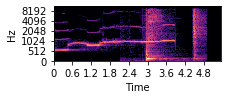

In [75]:
visualize_input(sample_input, config, 'spectrogram')

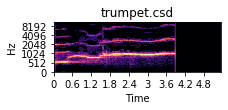

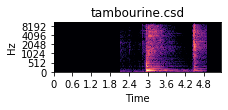

In [76]:
visualize_output(sample_gt, config, 'spectrogram', class_names=sample_components)

In [50]:
input_pcm = visualize_input(sample_input, config, 'pcm')
gt_pcms = visualize_output(sample_gt, config, 'pcm')

In [51]:
IPython.display.Audio(data=input_pcm, rate=config['dataset']['config']['sample_rate'])

In [52]:
IPython.display.Audio(data=gt_pcms[0], rate=config['dataset']['config']['sample_rate'])

In [53]:
IPython.display.Audio(data=gt_pcms[1], rate=config['dataset']['config']['sample_rate'])

visualize sample data

In [78]:
model = model.to(device)
optim = torch.optim.Adam(model.parameters(), lr=config['optimizer']['config']['lr'], betas=config['optimizer']['config']['betas'], eps=config['optimizer']['config']['epsilon'])

RuntimeError: CUDA error: device-side assert triggered

In [76]:
for e in range(config['model']['config']['max_epoch']):
    for i, batch in enumerate(val_dataloader):
        optim.zero_grad()
        model_input = batch['model_input'].to(device)
        ground_truths = batch['ground_truths'].to(device)

        model_output = model(model_input)

        class_names = [samples for samples in batch['component_info']]

        loss = loss_fn(model_input, model_output, ground_truths)
        loss.backward()
        optim.step()

    print(f"epoch {e} loss: {loss.item()}")

AttributeError: module 'torch.optim' has no attribute 'zero_grad'

In [53]:
model_output.size()

torch.Size([64, 2, 3, 167, 129])

In [59]:
snapshot = torch.load('/work/tianjunm/monaural-source-separation/experiments/snapshots/cSA-LSTM/001/200331/best')

In [60]:
snapshot['loss']

891930.376

In [66]:
model.load_state_dict(snapshot['model_state_dict'])

<All keys matched successfully>

In [77]:
model = model.to(device)
model_output = model(model_input.to(device))

In [78]:
model_input = model_input.to(device)

In [79]:
M_r, M_i = model_output[:, :, 0], model_output[:, :, 1]
Y_r = model_input[:, 0].unsqueeze(1)
Y_i = model_input[:, 1].unsqueeze(1)

S_r = M_r * Y_r - M_i * Y_i
S_i = M_r * Y_i + M_i * Y_r

predicted = torch.stack([S_r, S_i], dim=1)

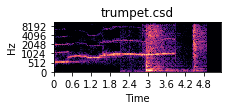

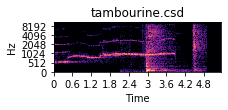

In [80]:
visualize_output(predicted[batch_idx].cpu().detach(), config, 'spectrogram', class_names=sample_components)

In [81]:
predicted_pcms = visualize_output(predicted[batch_idx].cpu().detach(), config, 'pcm')

In [82]:
IPython.display.Audio(data=predicted_pcms[0], rate=config['dataset']['config']['sample_rate'])

In [83]:
IPython.display.Audio(data=predicted_pcms[1], rate=config['dataset']['config']['sample_rate'])